### Fibonacci Sequence

A program that generates the first N fibonacci series numbers using the following methods
- with recursion
- without recursion

It captures the execution time of each subsequent number's generation, and plot each fibonacci series number and time it took to generate the number using matplotlib
<br/><br/>
Reference: https://www.geeksforgeeks.org/program-for-nth-fibonacci-number/

__Submitted By:__ Auradee Castro

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [31]:
# Fibonacci Number
n = int(input("Enter Fibonacci Number:")) 
print(f"N = {n}")

N = 40


In [13]:
#  Fibonacci sequence using recursion
def fibonacci_r(n):
    if n <= 1:
        return n
    return fibonacci_r(n-1) + fibonacci_r(n-2)

print("Fibonacci sequence using recursion\n")

time_arr_r = []
time_arr_r.append([-1, round(time.time_ns())])

for i in range(n + 1):
    num = fibonacci_r(i)
    time_ns = round(time.time_ns())
    time_arr_r.append([num, time_ns])

    print(f"{str(num).ljust(50, '.')} {time_ns - time_arr_r[0][1]} ns")

Fibonacci sequence using recursion

0................................................. 0 ns
1................................................. 0 ns
1................................................. 0 ns
2................................................. 0 ns
3................................................. 0 ns
5................................................. 0 ns
8................................................. 0 ns
13................................................ 0 ns
21................................................ 0 ns
34................................................ 0 ns
55................................................ 0 ns
89................................................ 999900 ns
144............................................... 999900 ns
233............................................... 999900 ns
377............................................... 999900 ns
610............................................... 999900 ns
987........................................

In [22]:
# Fibonacci sequence without recursion
def fibonacci_wr(n):
    f = [0, 1]
    for i in range(2, n+1):
        f.append(f[i-1] + f[i-2])
    return f[n]

print("Fibonacci sequence without recursion\n")

time_arr_wr = []
time_arr_wr.append([-1, time.time_ns()])

for i in range(n + 1):
    num = fibonacci_wr(i)
    time_ns = time.time_ns()
    time_arr_wr.append([num, time_ns])

    print(f"{str(num).ljust(50, '.')} {time_ns - time_arr_wr[0][1]} ns")

Fibonacci sequence without recursion

0................................................. 0 ns
1................................................. 0 ns
1................................................. 0 ns
2................................................. 0 ns
3................................................. 0 ns
5................................................. 0 ns
8................................................. 0 ns
13................................................ 0 ns
21................................................ 0 ns
34................................................ 0 ns
55................................................ 0 ns
89................................................ 0 ns
144............................................... 0 ns
233............................................... 0 ns
377............................................... 0 ns
610............................................... 0 ns
987............................................... 0 ns
1597......

In [24]:
# Populate x-values : N numbers of Fibonacci Sequence
fib_num_series = pd.Series(np.arange(n + 1))

print("Fibonacci Numbers")
print(fib_num_series.values)

Fibonacci Numbers
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


In [32]:
# Get y-values : execution time (with recursion)
time_recur_df = pd.DataFrame([(num[1] - time_arr_r[0][1]) for i, num in enumerate(time_arr_r)], columns = ['Time'])
time_recur_df = time_recur_df[1:]
time_recur_df.reset_index(drop=True, inplace=True)

print("Execution time (with recursion)")
print(time_recur_df)

Execution time (with recursion)
           Time
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11       999900
12       999900
13       999900
14       999900
15       999900
16       999900
17       999900
18      1998900
19      3008600
20      4201800
21      7000000
22      9997600
23     15996600
24     27599800
25     48634800
26     77681700
27    142631200
28    220123900
29    367696300
30    611530400
31    901342600
32   1359002500
33   2126015300
34   3470631100
35   5568996800
36   8767282200
37  14251542400
38  22922929200
39  36985625500
40  59693235400


In [33]:
# Get y-values : execution time (with recursion)
time_wo_recur_df = pd.DataFrame([(num[1] - time_arr_wr[0][1]) for i, num in enumerate(time_arr_wr)], columns = ['Time'])
time_wo_recur_df = time_wo_recur_df[1:]
time_wo_recur_df.reset_index(drop=True, inplace=True)

print("Execution time (without recursion)")
print(time_wo_recur_df)

Execution time (without recursion)
      Time
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30  991500
31  991500
32  991500
33  991500
34  991500
35  991500
36  991500
37  991500
38  991500
39  991500
40  991500


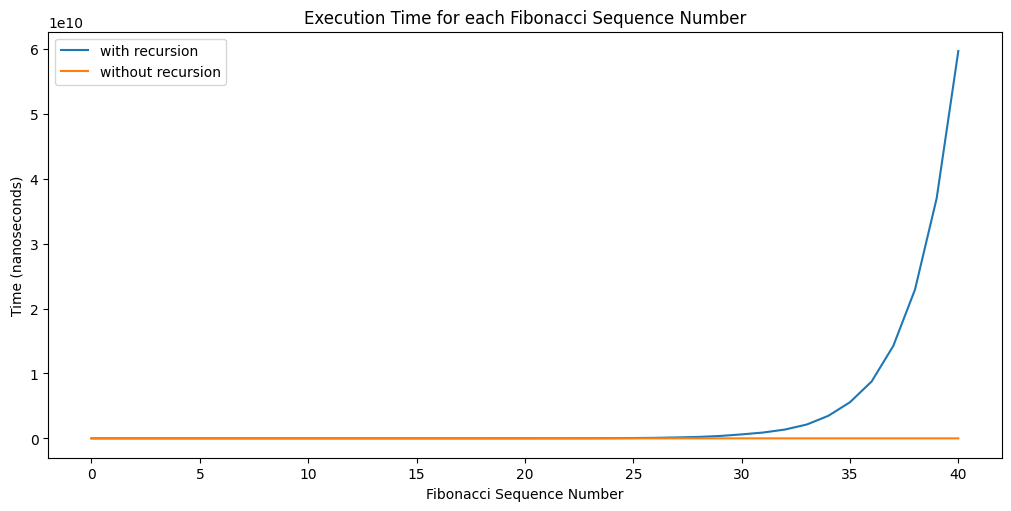

In [34]:
plt.figure(figsize=(10, 5), layout="constrained")
plt.plot(fib_num_series, time_recur_df, label="with recursion")
plt.plot(fib_num_series, time_wo_recur_df, label="without recursion")
plt.xlabel("Fibonacci Sequence Number")
plt.ylabel("Time (nanoseconds)")
plt.title("Execution Time for each Fibonacci Sequence Number")
plt.legend()

### Explanation

The time it takes to finish the Fibonacci Sequence with recursion has increased exponentially as compared to the conventional for-loop, which only iterates N-2 times to complete the computation for each sequence number. Recursion consumes significantly more memory as F(N) increases since it calls the same function 2^N times. Furthermore, previously computed values are temporarily cached in memory until the computation is completed. As a result, using recursion to calculate the Fibonacci Sequence is not efficient for both time and memory.